# GetAround 

[GetAround](https://www.getaround.com/?wpsrc=Google+Organic+Search) is the Airbnb for cars. You can rent cars from any person for a few hours to a few days! Founded in 2009, this company has known rapid growth. In 2019, they count over 5 million users and about 20K available cars worldwide. 

As Jedha's partner, they offered this great challenges.

## Delay EDA Goals 🎯

In order to mitigate those issues we’ve decided to implement a minimum delay between two rentals. A car won’t be displayed in the search results if the requested checkin or checkout times are too close from an already booked rental.

It solves the late checkout issue but also potentially hurts Getaround/owners revenues: we need to find the right trade off.

**Our Product Manager still needs to decide:**
* **threshold:** how long should the minimum delay be?
* **scope:** should we enable the feature for all cars?, only Connect cars?

In order to help them make the right decision, they are asking you for some data insights. Here are the first analyses they could think of, to kickstart the discussion. Don’t hesitate to perform additional analysis that you find relevant.

* Which share of our owner’s revenue would potentially be affected by the feature?
* How many rentals would be affected by the feature depending on the threshold and scope we choose?
* How often are drivers late for the next check-in? How does it impact the next driver?
* How many problematic cases will it solve depending on the chosen threshold and scope?

# Imports

In [38]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Dataset exploring

In [83]:
dataset = pd.read_excel(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\07_DEPLOYMENT_Getaround\src\get_around_delay_analysis.xlsx")
dataset.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [84]:
data_price = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\07_DEPLOYMENT_Getaround\src\get_around_pricing_project.csv")
data_price.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [11]:
# Information about initial dataset
print("general info : ")
display(dataset.info())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

general info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


None


Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [12]:
dataset.head(20)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN


In [16]:
print(dataset["checkin_type"].value_counts())
print(dataset["state"].value_counts())

checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64
state
ended       18045
canceled     3265
Name: count, dtype: int64


In [ ]:
# delay - delta

### How many rentals would be affected by the feature depending on the threshold and scope we choose?

In [68]:
# Only rentals that a previous one would be affected.
prop_two_rentals = (dataset["previous_ended_rental_id"]> 0).sum()/len(dataset)*100
print(f"percentage of second+ rental : {prop_two_rentals.round(1)}%")
two_or_more_rentals = dataset.loc[dataset["previous_ended_rental_id"]>0,:]

percentage of second+ rental : 8.6%


In [69]:
mobile_rentals = two_or_more_rentals[two_or_more_rentals["checkin_type"] == "mobile"]
connect_rentals = two_or_more_rentals[two_or_more_rentals["checkin_type"] == "connect"]

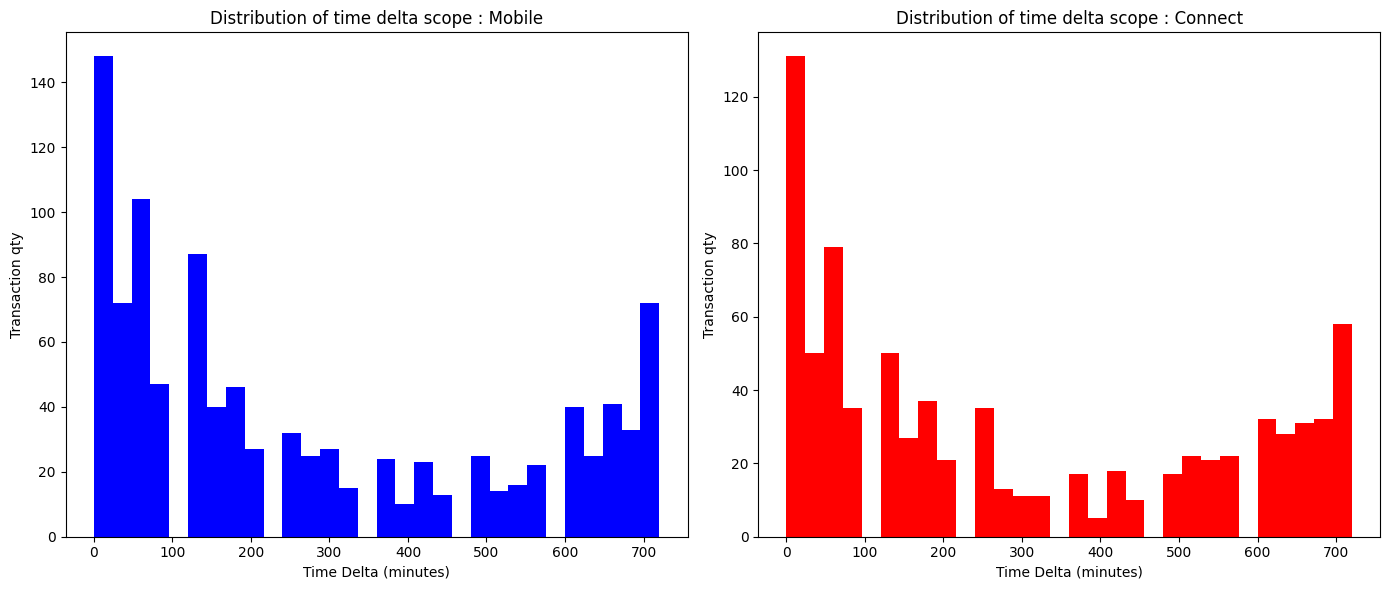

In [70]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(mobile_rentals["time_delta_with_previous_rental_in_minutes"], bins=30, color='blue')
plt.title("Distribution of time delta scope : Mobile")
plt.xlabel("Time Delta (minutes)")
plt.ylabel("Transaction qty")

plt.subplot(1, 2, 2)
plt.hist(connect_rentals["time_delta_with_previous_rental_in_minutes"], bins=30, color='red')
plt.title("Distribution of time delta scope : Connect")
plt.xlabel("Time Delta (minutes)")
plt.ylabel("Transaction qty")

plt.tight_layout()
plt.show()

In [71]:
# Let's see which ones are problematic
dataset_pb = two_or_more_rentals.loc[two_or_more_rentals["state"] == "canceled"]
display(dataset_pb)
mobile_pb = dataset_pb[dataset_pb["checkin_type"] == "mobile"]
connect_pb = dataset_pb[dataset_pb["checkin_type"] == "connect"]

state
False    1612
True      229
Name: count, dtype: int64


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
204,543768,374169,connect,canceled,NaN,543010.0,210.0
242,546160,352528,connect,canceled,NaN,546578.0,630.0
504,564627,341431,mobile,canceled,NaN,552005.0,150.0
637,568657,317378,connect,canceled,NaN,566412.0,210.0
669,516550,377700,mobile,canceled,NaN,545076.0,720.0
...,...,...,...,...,...,...,...
21172,566228,390871,connect,canceled,NaN,568465.0,60.0
21197,567305,405564,mobile,canceled,NaN,552222.0,0.0
21230,569706,245154,connect,canceled,NaN,558088.0,660.0
21269,568049,381499,connect,canceled,NaN,562174.0,720.0


### How many problematic cases will it solve depending on the chosen threshold and scope?

In [73]:
def plot_cumulative_frequency(data, label, color):
    sorted_data = np.sort(data)
    cumul_counts = np.arange(1, len(sorted_data)+1)
    plt.plot(sorted_data, cumul_counts, label=label, color=color)

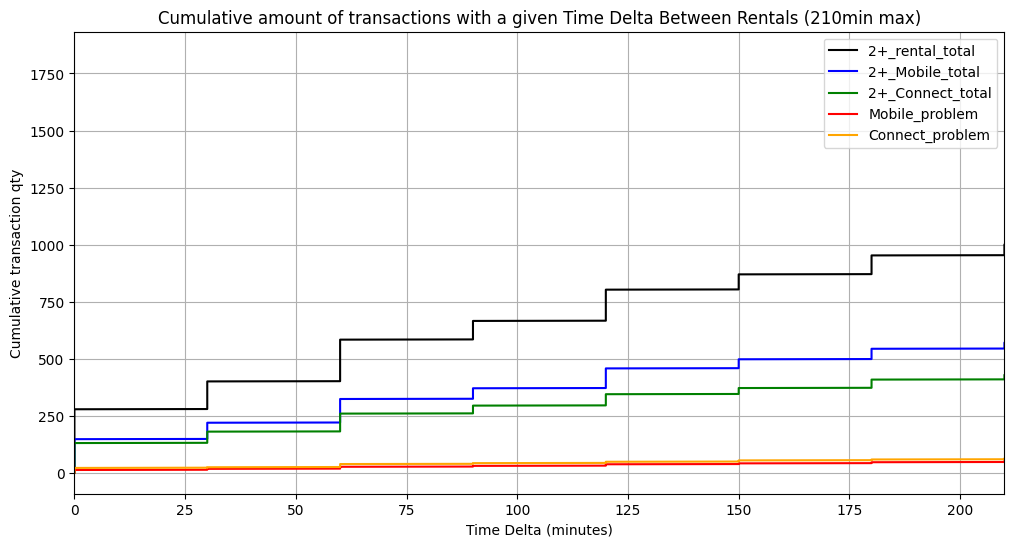

In [80]:
plt.figure(figsize=(12, 6))

plot_cumulative_frequency(two_or_more_rentals['time_delta_with_previous_rental_in_minutes'], '2+_rental_total', 'black')
plot_cumulative_frequency(mobile_rentals['time_delta_with_previous_rental_in_minutes'], '2+_Mobile_total', 'blue')
plot_cumulative_frequency(connect_rentals['time_delta_with_previous_rental_in_minutes'], '2+_Connect_total', 'green')
plot_cumulative_frequency(mobile_pb['time_delta_with_previous_rental_in_minutes'], 'Mobile_problem', 'red')
plot_cumulative_frequency(connect_pb['time_delta_with_previous_rental_in_minutes'], 'Connect_problem', 'orange')

plt.title('Cumulative amount of transactions with a given Time Delta Between Rentals (210min max)')
plt.xlabel('Time Delta (minutes)')
plt.ylabel('Cumulative transaction qty')
plt.xlim(0,210)
plt.legend()
plt.grid(True)
plt.show()

### How often are drivers late for the next check-in? How does it impact the next driver?

In [92]:
prop_late_drivers = (dataset["delay_at_checkout_in_minutes"]> 0).sum()/len(dataset)*100
print(f"Percentage of late drivers : {prop_late_drivers.round(1)}%")

problematic_cases = (two_or_more_rentals["state"] == "canceled").sum()/len(two_or_more_rentals)*100
print(f"Among drivers waiting, {problematic_cases.round(1)} % cancel their rental because of delay")

Percentage of late drivers : 44.1%
Among drivers waiting, 12.4 % cancel their rental because of delay
